# ML ASSIGNMENT USING IRIS DATASET 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [ ]:
# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [3]:
# Check for missing values
print("Missing values in features:", X.isnull().sum().sum())
print("Missing values in target:", y.isnull().sum())

Missing values in features: 0
Missing values in target: 0


In [4]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model Training

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [7]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Model Evaluation

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {'Logistic Regression': logreg, 'Decision Tree': dtree, 'KNN': knn}
results = []


In [10]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    })

In [11]:
result_df = pd.DataFrame(results).drop(columns='Confusion Matrix')
print(result_df)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression       1.0        1.0     1.0       1.0
1        Decision Tree       1.0        1.0     1.0       1.0
2                  KNN       1.0        1.0     1.0       1.0


### BIAS VARIANCE

In [12]:
import matplotlib.pyplot as plt

train_errors = []
test_errors = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors.append(1 - knn.score(X_train, y_train))
    test_errors.append(1 - knn.score(X_test, y_test))


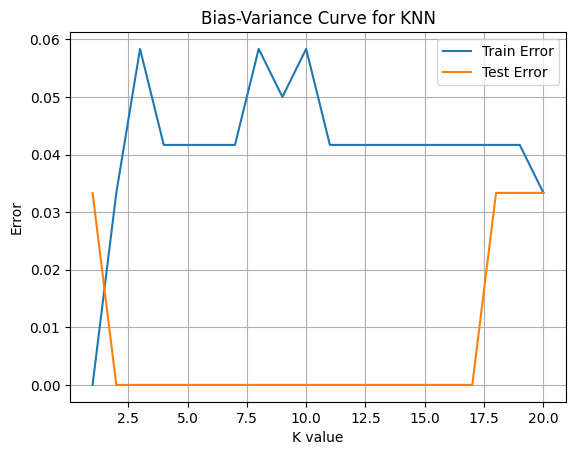

In [13]:
plt.plot(k_values, train_errors, label='Train Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('K value')
plt.ylabel('Error')
plt.title('Bias-Variance Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

### K FOLD CROSS VALIDATION

In [14]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} 5-Fold CV Accuracy: {scores.mean():.4f}")


Logistic Regression 5-Fold CV Accuracy: 0.9600
Decision Tree 5-Fold CV Accuracy: 0.9533
KNN 5-Fold CV Accuracy: 0.9600


### CONCLUSION

After trying all above models, i think the `logistic regression` worked the best for iris dataset. It gave us a balanced and good result.  The `Decision Tree` was good but sometimes too specific to the training data, and `KNN’s` performance changed a lot depending on the number of neighbors we chose. Overall, `Logistic Regression` is a reliable choice here because the Iris data is fairly easy to separate using a simple, straight-line decision boundary.